In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
import seaborn
seaborn.set()

In [3]:
# 支持中文
# 就是那个文件的文件名，记得对照大小写
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [4]:
import numpy as np
import pandas as pd

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [5]:
import numpy as np
import pandas as pd

class display2(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
   {0}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(repr(a)
                           for a in self.args)

In [6]:
#shift+tab显示方法参数提示 
#第一行为标题：201507德阳高一期末考试德阳市 考生成绩情况表
#header：指定作为列名的行，默认0，即取第一行的值为列名。数据为列名行以下的数据；若数据不含列名，则设定 header = None。
#index_col:作为索引的列
scores_df = pd.read_excel("data/2015年高一学年考试成绩（理科）.xls", header=1, index_col="序号")
scores_df.head()

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,理科数学,英语,理科综合,物理,化学,生物,总分
序号,,,,,,,,,,,,,,,
1,广汉中学,1班,寄读生,理科,14401030654,张子恒,510681201430110001,116,150,145.5,283,104,94,85,694.5
2,什邡中学,15班,寄读生,理科,14501030280,李青锴,510682201430110863,115,143,145.0,290,104,98,88,693.0
3,什邡中学,15班,寄读生,理科,14501030282,张庆春,510682201430110803,111,137,142.0,293,107,100,86,683.0
4,广汉中学,2班,寄读生,理科,14401030501,罗醴,510681201430110055,109,142,143.0,288,104,95,89,682.0
5,什邡中学,15班,寄读生,理科,14501030287,胡皓天,510682201430110867,109,143,139.0,288,105,100,83,679.0


In [7]:
# 修改部分列名
scores_df.rename(columns={"理科数学": "数学", "理科综合": "理综"}, inplace=True)
scores_df.head(3)

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分
序号,,,,,,,,,,,,,,,
1,广汉中学,1班,寄读生,理科,14401030654,张子恒,510681201430110001,116,150,145.5,283,104,94,85,694.5
2,什邡中学,15班,寄读生,理科,14501030280,李青锴,510682201430110863,115,143,145.0,290,104,98,88,693.0
3,什邡中学,15班,寄读生,理科,14501030282,张庆春,510682201430110803,111,137,142.0,293,107,100,86,683.0


In [8]:
# ndim、shape、size属性和ndarray一样
scores_df.ndim, scores_df.shape, scores_df.size

(2, (9855, 15), 147825)

In [9]:
scores_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9855 entries, 1 to 9855
Data columns (total 15 columns):
学校     9855 non-null object
班级     9855 non-null object
类别     9855 non-null object
科类     9855 non-null object
考生号    9855 non-null int64
姓名     9855 non-null object
学籍号    9835 non-null object
语文     9855 non-null int64
数学     9855 non-null int64
英语     9855 non-null float64
理综     9855 non-null int64
物理     9855 non-null int64
化学     9855 non-null int64
生物     9855 non-null int64
总分     9855 non-null float64
dtypes: float64(2), int64(7), object(6)
memory usage: 5.6 MB


In [10]:
scores_df.describe()

,考生号,语文,数学,英语,理综,物理,化学,生物,总分
count,9.855000e+03,9855.000000,9855.000000,9855.000000,9855.000000,9855.000000,9855.000000,9855.000000,9855.000000
mean,1.426950e+10,88.258549,74.025368,90.627752,152.899442,54.972197,51.766920,46.160325,405.811111
std,1.561058e+08,14.802376,29.873985,30.554906,59.964623,24.536582,21.776266,17.786013,122.138312
min,1.410103e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.410603e+10,80.000000,53.000000,69.500000,107.000000,36.000000,35.000000,33.000000,318.500000
50%,1.420303e+10,90.000000,75.000000,96.000000,155.000000,56.000000,52.000000,47.000000,413.000000
75%,1.440203e+10,98.000000,96.000000,115.000000,198.000000,75.000000,69.000000,59.000000,496.000000
max,1.460203e+10,129.000000,150.000000,148.000000,293.000000,110.000000,100.000000,90.000000,694.500000


In [11]:
scores_df.isna().sum()

学校      0
班级      0
类别      0
科类      0
考生号     0
姓名      0
学籍号    20
语文      0
数学      0
英语      0
理综      0
物理      0
化学      0
生物      0
总分      0
dtype: int64

In [12]:
scores_df.isnull().sum()

学校      0
班级      0
类别      0
科类      0
考生号     0
姓名      0
学籍号    20
语文      0
数学      0
英语      0
理综      0
物理      0
化学      0
生物      0
总分      0
dtype: int64

In [13]:
scores_df.isnull().any()

学校     False
班级     False
类别     False
科类     False
考生号    False
姓名     False
学籍号     True
语文     False
数学     False
英语     False
理综     False
物理     False
化学     False
生物     False
总分     False
dtype: bool

In [14]:
scores_df.isnull().any()[scores_df.isnull().any()]

学籍号    True
dtype: bool

In [15]:
#Indicate which axis or axes should be reduced.
scores_df[scores_df.isnull().any(axis=1)]

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分
序号,,,,,,,,,,,,,,,
1002,德阳三中,5班,寄读生,理科,14105030611,杨超,NaN,83,139,118.5,221,99,77,45,561.5
2136,广汉中学,7班,寄读生,理科,14401030824,卿晨植,NaN,84,113,110.5,201,90,46,65,508.5
4958,德阳五中旌湖,27班,寄读生,理科,14102030364,兰俊辉,NaN,90,82,72.0,168,90,31,47,412.0
5206,德阳三中,7班,寄读生,理科,14105030352,肖瑶,NaN,86,86,92.5,139,53,54,32,403.5
5597,中江实验中学,3班,寄读生,理科,14203031181,阮开星,NaN,71,77,88.5,154,56,54,44,390.5
6069,广汉金雁中学,12班,寄读生,理科,14402030660,张瀚洋,NaN,75,55,115.5,127,33,60,34,372.5
6887,中江城北中学,12班,寄读生,理科,14202030789,胡小会,NaN,96,52,42.5,149,64,48,37,339.5
7060,广汉金雁中学,12班,寄读生,理科,14402030677,曾罗轩,NaN,89,36,94.0,114,21,34,59,333.0
7317,南轩中学,2班,寄读生,理科,14302030675,孙子倩,NaN,78,57,80.0,107,32,40,35,322.0


In [16]:
# 使用iloc是不行的scores_df.iloc[scores_df.isnull().any(axis=1)]
scores_df.loc[scores_df.isnull().any(axis=1)]

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分
序号,,,,,,,,,,,,,,,
1002,德阳三中,5班,寄读生,理科,14105030611,杨超,NaN,83,139,118.5,221,99,77,45,561.5
2136,广汉中学,7班,寄读生,理科,14401030824,卿晨植,NaN,84,113,110.5,201,90,46,65,508.5
4958,德阳五中旌湖,27班,寄读生,理科,14102030364,兰俊辉,NaN,90,82,72.0,168,90,31,47,412.0
5206,德阳三中,7班,寄读生,理科,14105030352,肖瑶,NaN,86,86,92.5,139,53,54,32,403.5
5597,中江实验中学,3班,寄读生,理科,14203031181,阮开星,NaN,71,77,88.5,154,56,54,44,390.5
6069,广汉金雁中学,12班,寄读生,理科,14402030660,张瀚洋,NaN,75,55,115.5,127,33,60,34,372.5
6887,中江城北中学,12班,寄读生,理科,14202030789,胡小会,NaN,96,52,42.5,149,64,48,37,339.5
7060,广汉金雁中学,12班,寄读生,理科,14402030677,曾罗轩,NaN,89,36,94.0,114,21,34,59,333.0
7317,南轩中学,2班,寄读生,理科,14302030675,孙子倩,NaN,78,57,80.0,107,32,40,35,322.0


In [17]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9855 entries, 1 to 9855
Data columns (total 15 columns):
学校     9855 non-null object
班级     9855 non-null object
类别     9855 non-null object
科类     9855 non-null object
考生号    9855 non-null int64
姓名     9855 non-null object
学籍号    9835 non-null object
语文     9855 non-null int64
数学     9855 non-null int64
英语     9855 non-null float64
理综     9855 non-null int64
物理     9855 non-null int64
化学     9855 non-null int64
生物     9855 non-null int64
总分     9855 non-null float64
dtypes: float64(2), int64(7), object(6)
memory usage: 1.2+ MB


In [18]:
scores_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9855 entries, 1 to 9855
Data columns (total 15 columns):
学校     9855 non-null object
班级     9855 non-null object
类别     9855 non-null object
科类     9855 non-null object
考生号    9855 non-null int64
姓名     9855 non-null object
学籍号    9835 non-null object
语文     9855 non-null int64
数学     9855 non-null int64
英语     9855 non-null float64
理综     9855 non-null int64
物理     9855 non-null int64
化学     9855 non-null int64
生物     9855 non-null int64
总分     9855 non-null float64
dtypes: float64(2), int64(7), object(6)
memory usage: 5.6 MB


In [19]:
# 遍历Series：index+value
[item for item in scores_df.dtypes.items()]

[('学校', dtype('O')),
 ('班级', dtype('O')),
 ('类别', dtype('O')),
 ('科类', dtype('O')),
 ('考生号', dtype('int64')),
 ('姓名', dtype('O')),
 ('学籍号', dtype('O')),
 ('语文', dtype('int64')),
 ('数学', dtype('int64')),
 ('英语', dtype('float64')),
 ('理综', dtype('int64')),
 ('物理', dtype('int64')),
 ('化学', dtype('int64')),
 ('生物', dtype('int64')),
 ('总分', dtype('float64'))]

In [20]:
# dict推导
{name:str(dtype) for name,dtype in scores_df.dtypes.items()}

{'学校': 'object',
 '班级': 'object',
 '类别': 'object',
 '科类': 'object',
 '考生号': 'int64',
 '姓名': 'object',
 '学籍号': 'object',
 '语文': 'int64',
 '数学': 'int64',
 '英语': 'float64',
 '理综': 'int64',
 '物理': 'int64',
 '化学': 'int64',
 '生物': 'int64',
 '总分': 'float64'}

In [21]:
# 生成器作为参数可以省略括号
", ".join(name + ":" + str(dtype) for name,dtype in scores_df.dtypes.items())

'学校:object, 班级:object, 类别:object, 科类:object, 考生号:int64, 姓名:object, 学籍号:object, 语文:int64, 数学:int64, 英语:float64, 理综:int64, 物理:int64, 化学:int64, 生物:int64, 总分:float64'

In [22]:
# 学籍号转换int失败，看看哪些不是数字
indexs = scores_df["学籍号"].map(lambda x: not str(x).isnumeric())
scores_df[indexs]

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分
序号,,,,,,,,,,,,,,,
1002,德阳三中,5班,寄读生,理科,14105030611,杨超,NaN,83,139,118.5,221,99,77,45,561.5
2136,广汉中学,7班,寄读生,理科,14401030824,卿晨植,NaN,84,113,110.5,201,90,46,65,508.5
4958,德阳五中旌湖,27班,寄读生,理科,14102030364,兰俊辉,NaN,90,82,72.0,168,90,31,47,412.0
5206,德阳三中,7班,寄读生,理科,14105030352,肖瑶,NaN,86,86,92.5,139,53,54,32,403.5
5395,德阳外国语学校,10班,寄读生,理科,14104030416,张世奇,借读,97,73,89.5,138,47,42,49,397.5
5597,中江实验中学,3班,寄读生,理科,14203031181,阮开星,NaN,71,77,88.5,154,56,54,44,390.5
6069,广汉金雁中学,12班,寄读生,理科,14402030660,张瀚洋,NaN,75,55,115.5,127,33,60,34,372.5
6887,中江城北中学,12班,寄读生,理科,14202030789,胡小会,NaN,96,52,42.5,149,64,48,37,339.5
7060,广汉金雁中学,12班,寄读生,理科,14402030677,曾罗轩,NaN,89,36,94.0,114,21,34,59,333.0


In [23]:
# replace可以传字典或其他的类型
scores_df[indexs].replace({"借读":0, np.nan:0})

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分
序号,,,,,,,,,,,,,,,
1002,德阳三中,5班,寄读生,理科,14105030611,杨超,0,83,139,118.5,221,99,77,45,561.5
2136,广汉中学,7班,寄读生,理科,14401030824,卿晨植,0,84,113,110.5,201,90,46,65,508.5
4958,德阳五中旌湖,27班,寄读生,理科,14102030364,兰俊辉,0,90,82,72.0,168,90,31,47,412.0
5206,德阳三中,7班,寄读生,理科,14105030352,肖瑶,0,86,86,92.5,139,53,54,32,403.5
5395,德阳外国语学校,10班,寄读生,理科,14104030416,张世奇,0,97,73,89.5,138,47,42,49,397.5
5597,中江实验中学,3班,寄读生,理科,14203031181,阮开星,0,71,77,88.5,154,56,54,44,390.5
6069,广汉金雁中学,12班,寄读生,理科,14402030660,张瀚洋,0,75,55,115.5,127,33,60,34,372.5
6887,中江城北中学,12班,寄读生,理科,14202030789,胡小会,0,96,52,42.5,149,64,48,37,339.5
7060,广汉金雁中学,12班,寄读生,理科,14402030677,曾罗轩,0,89,36,94.0,114,21,34,59,333.0


In [24]:
scores_df[indexs] = scores_df[indexs].replace({"借读":0, np.nan:0})

In [25]:
scores_df[indexs]

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分
序号,,,,,,,,,,,,,,,
1002,德阳三中,5班,寄读生,理科,14105030611,杨超,0,83,139,118.5,221,99,77,45,561.5
2136,广汉中学,7班,寄读生,理科,14401030824,卿晨植,0,84,113,110.5,201,90,46,65,508.5
4958,德阳五中旌湖,27班,寄读生,理科,14102030364,兰俊辉,0,90,82,72.0,168,90,31,47,412.0
5206,德阳三中,7班,寄读生,理科,14105030352,肖瑶,0,86,86,92.5,139,53,54,32,403.5
5395,德阳外国语学校,10班,寄读生,理科,14104030416,张世奇,0,97,73,89.5,138,47,42,49,397.5
5597,中江实验中学,3班,寄读生,理科,14203031181,阮开星,0,71,77,88.5,154,56,54,44,390.5
6069,广汉金雁中学,12班,寄读生,理科,14402030660,张瀚洋,0,75,55,115.5,127,33,60,34,372.5
6887,中江城北中学,12班,寄读生,理科,14202030789,胡小会,0,96,52,42.5,149,64,48,37,339.5
7060,广汉金雁中学,12班,寄读生,理科,14402030677,曾罗轩,0,89,36,94.0,114,21,34,59,333.0


In [26]:
# 竟然没生效：copy=False在原对象上修改
# 重新赋值吧
scores_df = scores_df.astype({"学校":"category", "班级":"category", "类别":"category",
                  "科类":"category", "学籍号":"int64"}, copy=False)

In [27]:
scores_df.dtypes

学校     category
班级     category
类别     category
科类     category
考生号       int64
姓名       object
学籍号       int64
语文        int64
数学        int64
英语      float64
理综        int64
物理        int64
化学        int64
生物        int64
总分      float64
dtype: object

In [28]:
# 内存少了好多
scores_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9855 entries, 1 to 9855
Data columns (total 15 columns):
学校     9855 non-null category
班级     9855 non-null category
类别     9855 non-null category
科类     9855 non-null category
考生号    9855 non-null int64
姓名     9855 non-null object
学籍号    9855 non-null int64
语文     9855 non-null int64
数学     9855 non-null int64
英语     9855 non-null float64
理综     9855 non-null int64
物理     9855 non-null int64
化学     9855 non-null int64
生物     9855 non-null int64
总分     9855 non-null float64
dtypes: category(4), float64(2), int64(8), object(1)
memory usage: 1.7 MB


In [29]:
schools = scores_df["学校"]

In [30]:
# 注意：distinct没这个方法
# 求所有的不同的值使用unique()
schools.unique()

[广汉中学, 什邡中学, 德阳中学, 绵竹中学, 罗江中学, ..., 南轩中学, 东电中学, 中江仓山中学, 中江龙台中学, 广汉六中]
Length: 21
Categories (21, object): [广汉中学, 什邡中学, 德阳中学, 绵竹中学, ..., 东电中学, 中江仓山中学, 中江龙台中学, 广汉六中]

In [31]:
type( schools.unique() )

pandas.core.arrays.categorical.Categorical

In [32]:
type(schools.unique()[0])

str

In [33]:
scores_df["语文"].unique()

array([116, 115, 111, 109, 117, 101, 114, 107, 113, 112, 129, 103, 121,
       104, 123, 105, 119, 110, 122,  97, 106, 102, 118, 120, 108,  99,
        87, 100,  93,  94,  98,  95,  96,  90,  85,  92,  89,  86,  83,
        91, 124,  84,  88,  77, 125,  82,  80,  81,  78,  76,  73,  79,
        74,  75,  72,  68,  61,  66,  71,  70,  60,  65,  69,  64,  62,
        63,  67,  49,  47,  54,  58,  59,  28,  55,  50,  36,  51,  57,
        56,  26,  48,  53,  30,  41,  44,  31,  23,  52,  37,  34,  43,
        46,  35,  45,  20,  32,  17,  39,  42,  19,  18,   5,  25,   6,
         3,   0,   9], dtype=int64)

In [34]:
type( scores_df["语文"].unique() )

numpy.ndarray

In [35]:
scores_df.groupby("学校")["总分"].count()

学校
东汽八一中学     191
东电中学       251
中江中学       971
中江仓山中学     152
中江城北中学     739
中江实验中学     665
中江龙台中学     225
什邡七一中学     533
什邡中学       726
南轩中学       456
广汉中学       501
广汉六中       266
广汉金雁中学     461
德阳三中       299
德阳中学       958
德阳五中天元     563
德阳五中旌湖     305
德阳外国语学校    321
绵竹中学       752
罗江中学       399
罗江潺亭中学     121
Name: 总分, dtype: int64

In [36]:
scores_df.groupby("学校")["总分"].count().sum()

9855

In [37]:
# 每个学校的学生
schoolStus = scores_df.groupby("学校")["总分"].count()

<BarContainer object of 21 artists>

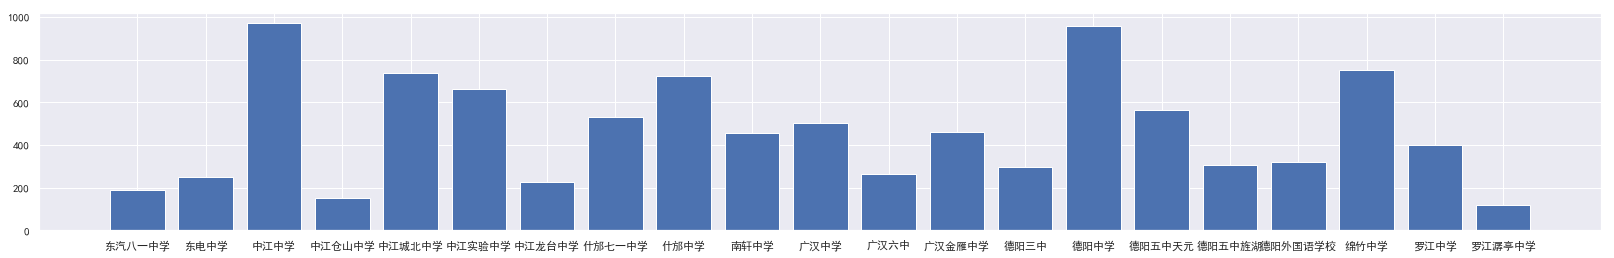

In [38]:
fig, ax = plt.subplots(figsize=(28,4))
ax.bar(schoolStus.index, schoolStus.values)

In [39]:
# 计算value_counts的便捷函数
# 这个还从大到小排好序了
scores_df['学校'].value_counts()

中江中学       971
德阳中学       958
绵竹中学       752
中江城北中学     739
什邡中学       726
中江实验中学     665
德阳五中天元     563
什邡七一中学     533
广汉中学       501
广汉金雁中学     461
南轩中学       456
罗江中学       399
德阳外国语学校    321
德阳五中旌湖     305
德阳三中       299
广汉六中       266
东电中学       251
中江龙台中学     225
东汽八一中学     191
中江仓山中学     152
罗江潺亭中学     121
Name: 学校, dtype: int64

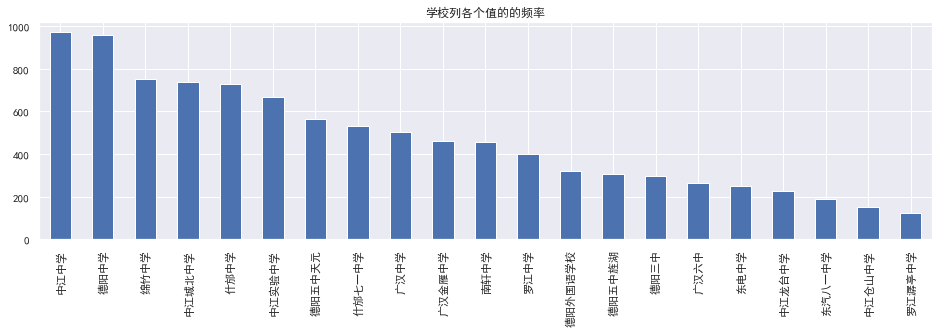

In [40]:
scores_df['学校'].value_counts().plot(kind='bar',title='学校列各个值的的频率', figsize=(16,4))

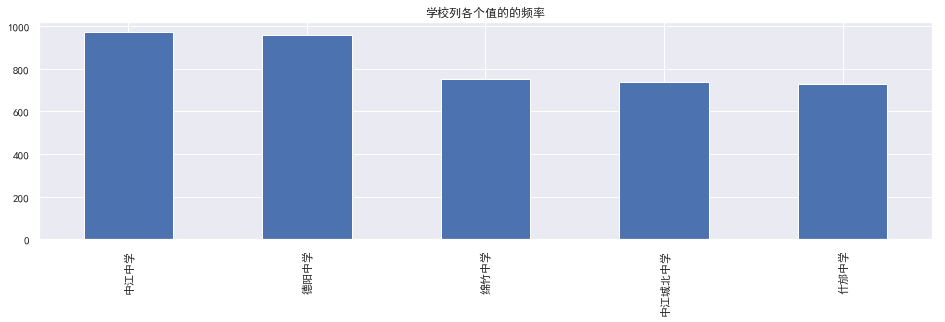

In [41]:
# pandas的lable就是竖着的
scores_df['学校'].value_counts()[0:5].plot(kind='bar',title='学校列各个值的的频率', figsize=(16,4))

In [42]:
#字体
#D:\Python37\Lib\site-packages\matplotlib\mpl-data\fonts\ttf
import matplotlib
print(matplotlib.matplotlib_fname())

d:\python37\lib\site-packages\matplotlib\mpl-data\matplotlibrc


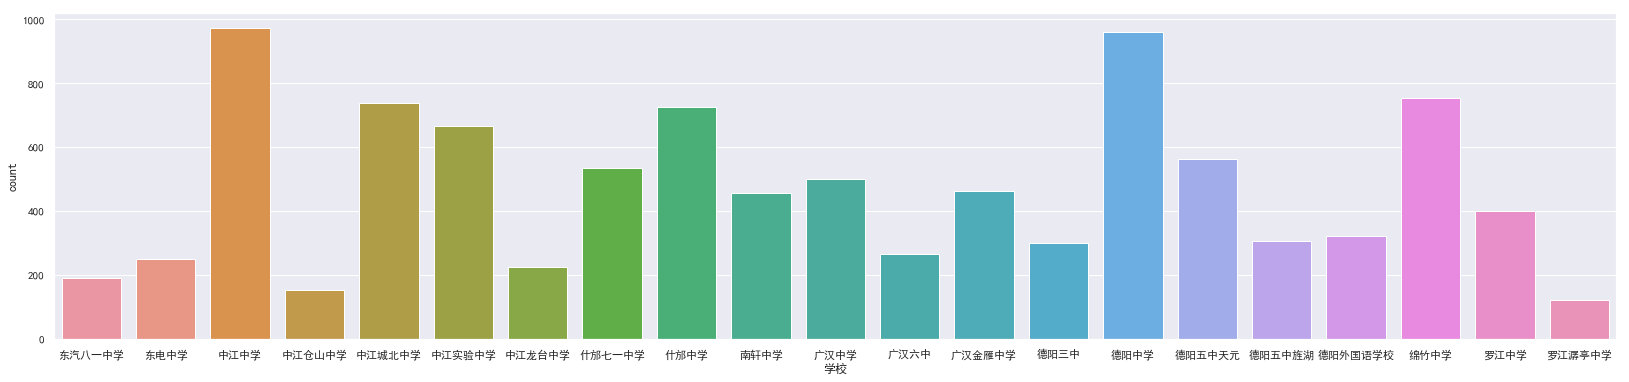

In [43]:
fig, ax = plt.subplots(figsize=(28,6))
sns.countplot(x="学校", data=scores_df, ax=ax)

In [44]:
schoolStus = scores_df["学校"].value_counts()
schoolStus

中江中学       971
德阳中学       958
绵竹中学       752
中江城北中学     739
什邡中学       726
中江实验中学     665
德阳五中天元     563
什邡七一中学     533
广汉中学       501
广汉金雁中学     461
南轩中学       456
罗江中学       399
德阳外国语学校    321
德阳五中旌湖     305
德阳三中       299
广汉六中       266
东电中学       251
中江龙台中学     225
东汽八一中学     191
中江仓山中学     152
罗江潺亭中学     121
Name: 学校, dtype: int64

In [45]:
schoolStus = scores_df.groupby("学校")["考生号"].count()
schoolStus

学校
东汽八一中学     191
东电中学       251
中江中学       971
中江仓山中学     152
中江城北中学     739
中江实验中学     665
中江龙台中学     225
什邡七一中学     533
什邡中学       726
南轩中学       456
广汉中学       501
广汉六中       266
广汉金雁中学     461
德阳三中       299
德阳中学       958
德阳五中天元     563
德阳五中旌湖     305
德阳外国语学校    321
绵竹中学       752
罗江中学       399
罗江潺亭中学     121
Name: 考生号, dtype: int64

In [46]:
# Series转换至DataFrame
schoolStusDf = schoolStus.reset_index(name="学生数")
schoolStusDf

,学校,学生数
0,东汽八一中学,191
1,东电中学,251
2,中江中学,971
3,中江仓山中学,152
4,中江城北中学,739
5,中江实验中学,665
6,中江龙台中学,225
7,什邡七一中学,533
8,什邡中学,726
9,南轩中学,456


In [47]:
# 按照学生数排序，原地排序
# schoolStusDf.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
schoolStusDf.sort_values(["学生数"], ascending=False, inplace=True)
schoolStusDf

,学校,学生数
2,中江中学,971
14,德阳中学,958
18,绵竹中学,752
4,中江城北中学,739
8,什邡中学,726
5,中江实验中学,665
15,德阳五中天元,563
7,什邡七一中学,533
10,广汉中学,501
12,广汉金雁中学,461


In [48]:
# 删除原索引、重建默认递增索引
schoolStusDf.reset_index(drop=True, inplace=True)
schoolStusDf

,学校,学生数
0,中江中学,971
1,德阳中学,958
2,绵竹中学,752
3,中江城北中学,739
4,什邡中学,726
5,中江实验中学,665
6,德阳五中天元,563
7,什邡七一中学,533
8,广汉中学,501
9,广汉金雁中学,461


In [49]:
# 前10的
schoolStusDf[0:10]

,学校,学生数
0,中江中学,971
1,德阳中学,958
2,绵竹中学,752
3,中江城北中学,739
4,什邡中学,726
5,中江实验中学,665
6,德阳五中天元,563
7,什邡七一中学,533
8,广汉中学,501
9,广汉金雁中学,461


In [50]:
# 每个学校的成绩统计
scores_df.groupby("学校").aggregate({'考生号': 'count', '语文': ['mean', 'median'], '数学': ['mean', 'median'],
'英语': ['mean', 'median'], '理综':['mean', 'median'], '总分': ['mean', 'median']}
)

考生号         语文                数学                 英语          \
        count       mean median       mean median        mean  median   
学校                                                                      
东汽八一中学    191  84.026178     85  59.413613     56   67.479058   63.50   
东电中学      251  77.609562     78  52.752988     51   64.300797   60.50   
中江中学      971  89.358393     90  75.128733     77   92.783728   99.00   
中江仓山中学    152  71.532895     73  39.085526     39   59.572368   61.75   
中江城北中学    739  88.991881     91  73.231394     74   80.157645   82.50   
中江实验中学    665  78.990977     80  49.763910     48   64.013534   62.00   
中江龙台中学    225  65.493333     68  26.991111     21   43.517778   37.00   
什邡七一中学    533  90.450281     92  74.555347     76   84.477486   87.50   
什邡中学      726  98.225895     99  89.585399     89  109.805096  113.00   
南轩中学      456  78.032895     79  51.125000     50   72.655702   73.50   
广汉中学      501  94.664671     96  86.051896     86  108.899202  114.00   
广汉六中      266  74.071429     75  46.582707     45   60.757519   58.00   
广汉金雁中学    461  87.969631     88  71.453362     71   95.502169   98.00   
德阳三中      299  82.986622     83  61.635452     62   81.563545   85.00   
德阳中学      958  91.540710     92  91.313152     92  111.462944  115.50   
德阳五中天元    563  90.657194     92  77.909414     79   95.755773   97.00   
德阳五中旌湖    305  95.554098     97  95.295082     99  110.095082  116.50   
德阳外国语学校   321  90.629283     92  81.292835     80  102.392523  109.50   
绵竹中学      752  95.095745     96  91.892287     94  108.872340  112.50   
罗江中学      399  95.591479     96  83.939850     86   98.711779  103.00   
罗江潺亭中学    121  77.371901     78  71.884298     70   65.756198   63.00   

                 理综                 总分          
               mean median        mean  median  
学校                                              
东汽八一中学   128.261780  123.0  339.180628  322.50  
东电中学      94.872510   89.0  289.535857  276.00  
中江中学     163.328527  170.0  420.599382  436.50  
中江仓山中学    77.967105   74.5  248.157895  248.50  
中江城北中学   142.745602  146.0  385.126522  389.50  
中江实验中学   109.169925  106.0  301.938346  302.00  
中江龙台中学    64.737778   57.0  200.740000  187.00  
什邡七一中学   148.547842  153.0  398.030957  412.50  
什邡中学     185.771350  187.0  483.387741  484.00  
南轩中学     106.019737  100.5  307.833333  300.50  
广汉中学     180.716567  185.0  470.332335  482.00  
广汉六中      87.281955   80.0  268.693609  269.75  
广汉金雁中学   155.255965  156.0  410.181128  407.50  
德阳三中     127.260870  127.0  353.446488  358.00  
德阳中学     180.947808  182.0  475.264614  481.50  
德阳五中天元   162.449378  166.0  426.771758  431.00  
德阳五中旌湖   190.921311  194.0  491.865574  501.50  
德阳外国语学校  167.018692  170.0  441.333333  448.00  
绵竹中学     194.140957  201.0  490.001330  495.50  
罗江中学     179.764411  183.0  458.007519  467.00  
罗江潺亭中学   126.239669  120.0  341.252066  339.50

In [51]:
# sort_values排序多级索引时，必须传包含多级索引的元祖，少的话不能保证列的唯一性
scores_df.groupby("学校").aggregate({'考生号': 'count', '语文': ['mean', 'median'], '数学': ['mean', 'median'],
'英语': ['mean', 'median'], '理综':['mean', 'median'], '总分': ['mean', 'median']}
).sort_values(('考生号','count'), ascending=False)

考生号         语文                数学                 英语          \
        count       mean median       mean median        mean  median   
学校                                                                      
中江中学      971  89.358393     90  75.128733     77   92.783728   99.00   
德阳中学      958  91.540710     92  91.313152     92  111.462944  115.50   
绵竹中学      752  95.095745     96  91.892287     94  108.872340  112.50   
中江城北中学    739  88.991881     91  73.231394     74   80.157645   82.50   
什邡中学      726  98.225895     99  89.585399     89  109.805096  113.00   
中江实验中学    665  78.990977     80  49.763910     48   64.013534   62.00   
德阳五中天元    563  90.657194     92  77.909414     79   95.755773   97.00   
什邡七一中学    533  90.450281     92  74.555347     76   84.477486   87.50   
广汉中学      501  94.664671     96  86.051896     86  108.899202  114.00   
广汉金雁中学    461  87.969631     88  71.453362     71   95.502169   98.00   
南轩中学      456  78.032895     79  51.125000     50   72.655702   73.50   
罗江中学      399  95.591479     96  83.939850     86   98.711779  103.00   
德阳外国语学校   321  90.629283     92  81.292835     80  102.392523  109.50   
德阳五中旌湖    305  95.554098     97  95.295082     99  110.095082  116.50   
德阳三中      299  82.986622     83  61.635452     62   81.563545   85.00   
广汉六中      266  74.071429     75  46.582707     45   60.757519   58.00   
东电中学      251  77.609562     78  52.752988     51   64.300797   60.50   
中江龙台中学    225  65.493333     68  26.991111     21   43.517778   37.00   
东汽八一中学    191  84.026178     85  59.413613     56   67.479058   63.50   
中江仓山中学    152  71.532895     73  39.085526     39   59.572368   61.75   
罗江潺亭中学    121  77.371901     78  71.884298     70   65.756198   63.00   

                 理综                 总分          
               mean median        mean  median  
学校                                              
中江中学     163.328527  170.0  420.599382  436.50  
德阳中学     180.947808  182.0  475.264614  481.50  
绵竹中学     194.140957  201.0  490.001330  495.50  
中江城北中学   142.745602  146.0  385.126522  389.50  
什邡中学     185.771350  187.0  483.387741  484.00  
中江实验中学   109.169925  106.0  301.938346  302.00  
德阳五中天元   162.449378  166.0  426.771758  431.00  
什邡七一中学   148.547842  153.0  398.030957  412.50  
广汉中学     180.716567  185.0  470.332335  482.00  
广汉金雁中学   155.255965  156.0  410.181128  407.50  
南轩中学     106.019737  100.5  307.833333  300.50  
罗江中学     179.764411  183.0  458.007519  467.00  
德阳外国语学校  167.018692  170.0  441.333333  448.00  
德阳五中旌湖   190.921311  194.0  491.865574  501.50  
德阳三中     127.260870  127.0  353.446488  358.00  
广汉六中      87.281955   80.0  268.693609  269.75  
东电中学      94.872510   89.0  289.535857  276.00  
中江龙台中学    64.737778   57.0  200.740000  187.00  
东汽八一中学   128.261780  123.0  339.180628  322.50  
中江仓山中学    77.967105   74.5  248.157895  248.50  
罗江潺亭中学   126.239669  120.0  341.252066  339.50

In [52]:
scores_df.groupby("学校").aggregate({'考生号': 'count', '语文': 'mean', '数学': 'mean',
'英语': 'mean', '理综':'mean', '总分': 'mean'}
).sort_values('考生号', ascending=False)

,考生号,语文,数学,英语,理综,总分
学校,,,,,,
中江中学,971,89.358393,75.128733,92.783728,163.328527,420.599382
德阳中学,958,91.540710,91.313152,111.462944,180.947808,475.264614
绵竹中学,752,95.095745,91.892287,108.872340,194.140957,490.001330
中江城北中学,739,88.991881,73.231394,80.157645,142.745602,385.126522
什邡中学,726,98.225895,89.585399,109.805096,185.771350,483.387741
中江实验中学,665,78.990977,49.763910,64.013534,109.169925,301.938346
德阳五中天元,563,90.657194,77.909414,95.755773,162.449378,426.771758
什邡七一中学,533,90.450281,74.555347,84.477486,148.547842,398.030957
广汉中学,501,94.664671,86.051896,108.899202,180.716567,470.332335


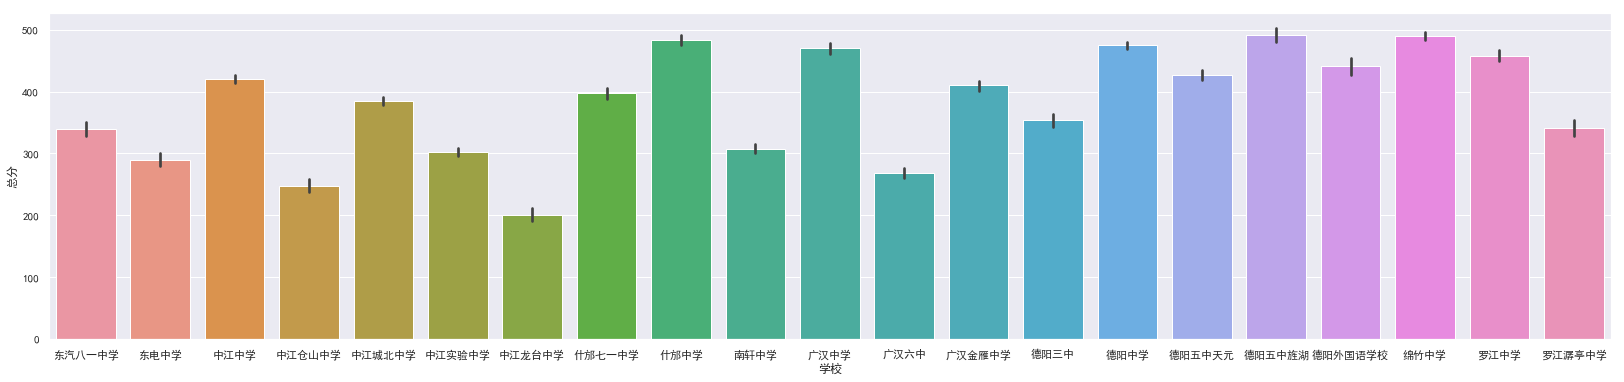

In [53]:
# sns.barplot直接能根据数据画出平均值。
fig, ax = plt.subplots(figsize=(28,6))
ax = sns.barplot(x="学校", y="总分", data=scores_df, ax=ax)

In [54]:
# 确实是平局值
scores_df.groupby("学校").aggregate({ '总分': 'mean'}
)

,总分
学校,
东汽八一中学,339.180628
东电中学,289.535857
中江中学,420.599382
中江仓山中学,248.157895
中江城北中学,385.126522
中江实验中学,301.938346
中江龙台中学,200.740000
什邡七一中学,398.030957
什邡中学,483.387741


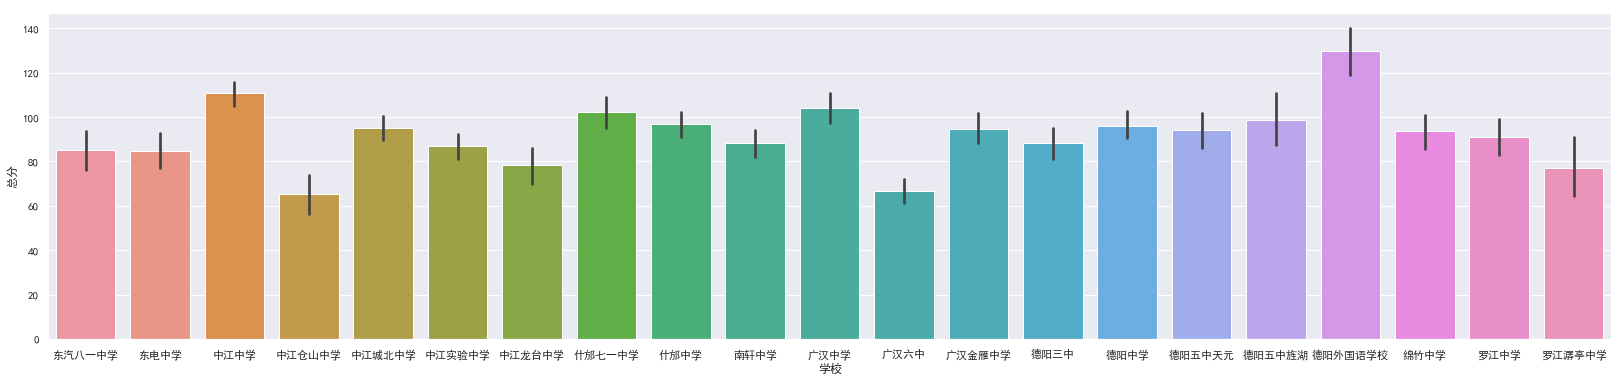

In [55]:
# sns.barplot也可以指定作用于每个向量的函数。
fig, ax = plt.subplots(figsize=(28,6))
ax = sns.barplot(x="学校", y="总分", data=scores_df, estimator=np.std, ax=ax)

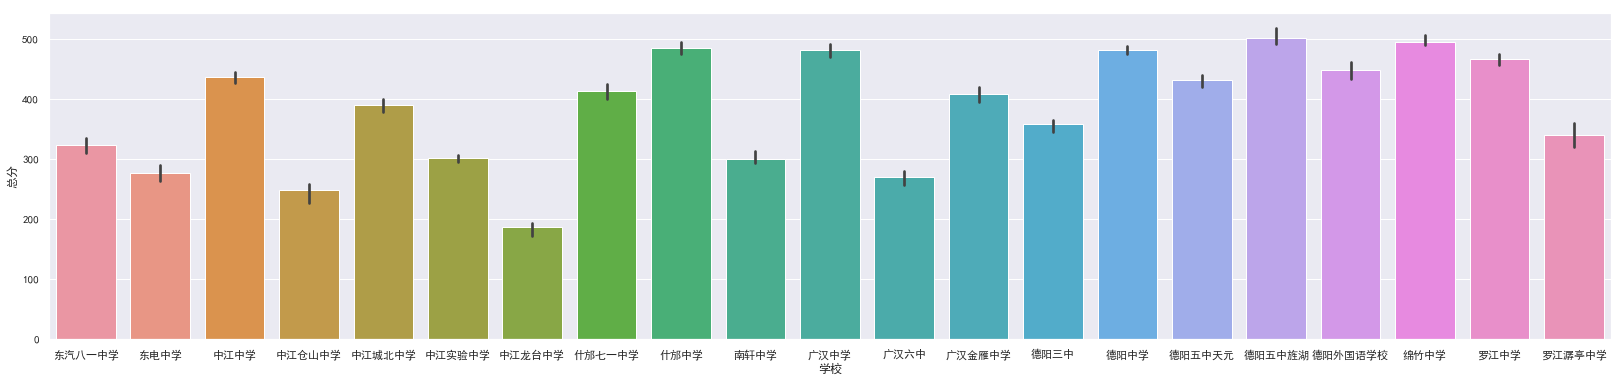

In [56]:
fig, ax = plt.subplots(figsize=(28,6))
ax = sns.barplot(x="学校", y="总分", data=scores_df, estimator=np.median, ax=ax)

In [57]:
# describe这个函数真nb
scores_df.groupby("学校")["总分"].describe()

,count,mean,std,min,25%,50%,75%,max
学校,,,,,,,,
东汽八一中学,191.0,339.180628,85.476636,175.5,277.250,322.50,396.250,587.0
东电中学,251.0,289.535857,84.993392,0.0,230.250,276.00,337.500,527.5
中江中学,971.0,420.599382,110.766612,0.0,344.000,436.50,502.000,670.5
中江仓山中学,152.0,248.157895,65.420328,0.0,202.625,248.50,290.250,458.5
中江城北中学,739.0,385.126522,95.207824,0.0,322.250,389.50,452.250,636.5
中江实验中学,665.0,301.938346,87.022721,0.0,239.500,302.00,357.000,614.0
中江龙台中学,225.0,200.740000,78.601817,0.0,150.000,187.00,230.000,447.0
什邡七一中学,533.0,398.030957,102.211194,0.0,329.000,412.50,469.500,629.0
什邡中学,726.0,483.387741,96.961582,0.0,420.000,484.00,550.625,693.0


In [58]:
# 还可以看多个
scores_df.groupby("学校")[["总分","理综"]].describe()

总分                                                           \
         count        mean         std    min      25%     50%      75%   
学校                                                                        
东汽八一中学   191.0  339.180628   85.476636  175.5  277.250  322.50  396.250   
东电中学     251.0  289.535857   84.993392    0.0  230.250  276.00  337.500   
中江中学     971.0  420.599382  110.766612    0.0  344.000  436.50  502.000   
中江仓山中学   152.0  248.157895   65.420328    0.0  202.625  248.50  290.250   
中江城北中学   739.0  385.126522   95.207824    0.0  322.250  389.50  452.250   
中江实验中学   665.0  301.938346   87.022721    0.0  239.500  302.00  357.000   
中江龙台中学   225.0  200.740000   78.601817    0.0  150.000  187.00  230.000   
什邡七一中学   533.0  398.030957  102.211194    0.0  329.000  412.50  469.500   
什邡中学     726.0  483.387741   96.961582    0.0  420.000  484.00  550.625   
南轩中学     456.0  307.833333   88.250746    0.0  246.500  300.50  369.750   
广汉中学     501.0  470.332335  104.070788    0.0  395.500  482.00  552.000   
广汉六中     266.0  268.693609   67.030471   59.5  219.125  269.75  314.500   
广汉金雁中学   461.0  410.181128   94.938099    0.0  347.000  407.50  470.500   
德阳三中     299.0  353.446488   88.588183  100.5  297.250  358.00  417.250   
德阳中学     958.0  475.264614   96.194838    0.0  418.000  481.50  541.500   
德阳五中天元   563.0  426.771758   94.090003    0.0  371.750  431.00  491.500   
德阳五中旌湖   305.0  491.865574   98.957036    0.0  432.000  501.50  568.000   
德阳外国语学校  321.0  441.333333  129.846500    0.0  354.000  448.00  543.500   
绵竹中学     752.0  490.001330   93.628064    0.0  434.500  495.50  555.500   
罗江中学     399.0  458.007519   91.202202    0.0  406.750  467.00  520.250   
罗江潺亭中学   121.0  341.252066   77.324886    0.0  289.000  339.50  392.500   

                   理综                                                      \
           max  count        mean        std   min     25%    50%     75%   
学校                                                                          
东汽八一中学   587.0  191.0  128.261780  47.397030  33.0   92.00  123.0  167.00   
东电中学     527.5  251.0   94.872510  40.418606   0.0   65.00   89.0  122.50   
中江中学     670.5  971.0  163.328527  55.539344   0.0  124.00  170.0  206.50   
中江仓山中学   458.5  152.0   77.967105  30.319582   0.0   56.75   74.5   93.25   
中江城北中学   636.5  739.0  142.745602  48.169194   0.0  107.00  146.0  177.50   
中江实验中学   614.0  665.0  109.169925  42.919191   0.0   76.00  106.0  136.00   
中江龙台中学   447.0  225.0   64.737778  31.993549   0.0   43.00   57.0   81.00   
什邡七一中学   629.0  533.0  148.547842  53.068370   0.0  110.00  153.0  189.00   
什邡中学     693.0  726.0  185.771350  52.703491   0.0  150.00  187.0  226.00   
南轩中学     528.5  456.0  106.019737  44.069895   0.0   73.00  100.5  134.00   
广汉中学     694.5  501.0  180.716567  54.138485   0.0  142.00  185.0  224.00   
广汉六中     445.0  266.0   87.281955  32.792881  24.0   64.00   80.0  110.00   
广汉金雁中学   645.0  461.0  155.255965  50.873282   0.0  117.00  156.0  192.00   
德阳三中     580.5  299.0  127.260870  44.244578  27.0   98.00  127.0  156.00   
德阳中学     677.5  958.0  180.947808  49.840890   0.0  148.00  182.0  217.00   
德阳五中天元   646.0  563.0  162.449378  50.835673   0.0  131.50  166.0  197.00   
德阳五中旌湖   668.0  305.0  190.921311  50.512704   0.0  158.00  194.0  230.00   
德阳外国语学校  671.0  321.0  167.018692  65.477331   0.0  124.00  170.0  221.00   
绵竹中学     676.0  752.0  194.140957  48.727579   0.0  160.00  201.0  232.00   
罗江中学     672.0  399.0  179.764411  47.154399   0.0  155.00  183.0  213.00   
罗江潺亭中学   539.5  121.0  126.239669  43.554760   0.0   91.00  120.0  164.00   

                
           max  
学校              
东汽八一中学   244.0  
东电中学     233.0  
中江中学     281.0  
中江仓山中学   180.0  
中江城北中学   272.0  
中江实验中学   260.0  
中江龙台中学   199.0  
什邡七一中学   269.0  
什邡中学     293.0  
南轩中学     235.0  
广汉中学     288.0  
广汉六中     213.0  
广汉金雁中学   270.0  
德阳三中     233.0  
德阳中学     289.0  
德阳五中天元   272.0  
德阳五中旌湖   285.0  
德阳外国语学校  287.0  
绵竹中学 

In [59]:
# 总分最高的几个学生
scores_df.sort_values("总分", ascending=False).iloc[:5]

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分
序号,,,,,,,,,,,,,,,
1,广汉中学,1班,寄读生,理科,14401030654,张子恒,510681201430110001,116,150,145.5,283,104,94,85,694.5
2,什邡中学,15班,寄读生,理科,14501030280,李青锴,510682201430110863,115,143,145.0,290,104,98,88,693.0
3,什邡中学,15班,寄读生,理科,14501030282,张庆春,510682201430110803,111,137,142.0,293,107,100,86,683.0
4,广汉中学,2班,寄读生,理科,14401030501,罗醴,510681201430110055,109,142,143.0,288,104,95,89,682.0
5,什邡中学,15班,寄读生,理科,14501030287,胡皓天,510682201430110867,109,143,139.0,288,105,100,83,679.0


In [60]:
# 总分最低的几个学生
scores_df.sort_values("总分", ascending=True).iloc[:5]

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分
序号,,,,,,,,,,,,,,,
9855,罗江潺亭中学,6班,寄读生,理科,14602030402,肖力,510626201430210412,0,0,0.0,0,0,0,0,0.0
9829,中江城北中学,19班,寄读生,理科,14202030991,陈靖,510623201430221207,0,0,0.0,0,0,0,0,0.0
9828,中江城北中学,18班,寄读生,理科,14202031287,陈静,510623201430220458,0,0,0.0,0,0,0,0,0.0
9827,中江中学,13班,寄读生,理科,14201031506,高源,510623201430110692,0,0,0.0,0,0,0,0,0.0
9826,中江中学,11班,寄读生,理科,14201031592,吴遥,510623201430110466,0,0,0.0,0,0,0,0,0.0


In [61]:
# 总分最高的几个学生
scores_df.sort_values("理综", ascending=False).iloc[:5]

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分
序号,,,,,,,,,,,,,,,
3,什邡中学,15班,寄读生,理科,14501030282,张庆春,510682201430110803,111,137,142.0,293,107,100,86,683.0
10,什邡中学,15班,寄读生,理科,14501030290,衡骁,510682201430110871,115,133,134.5,291,105,98,88,673.5
11,罗江中学,1班,寄读生,理科,14601030290,李玉钜,510626201430110050,113,137,131.0,291,107,97,87,672.0
2,什邡中学,15班,寄读生,理科,14501030280,李青锴,510682201430110863,115,143,145.0,290,104,98,88,693.0
7,德阳中学,1班,寄读生,理科,14101030513,罗宸晟,510603201430111392,101,149,138.5,289,110,92,87,677.5


In [62]:
# 计算一下总分
scores_df["总分1"] = scores_df["语文"] + scores_df["数学"] + scores_df["英语"] + scores_df["理综"]
scores_df.head()

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分,总分1
序号,,,,,,,,,,,,,,,,
1,广汉中学,1班,寄读生,理科,14401030654,张子恒,510681201430110001,116,150,145.5,283,104,94,85,694.5,694.5
2,什邡中学,15班,寄读生,理科,14501030280,李青锴,510682201430110863,115,143,145.0,290,104,98,88,693.0,693.0
3,什邡中学,15班,寄读生,理科,14501030282,张庆春,510682201430110803,111,137,142.0,293,107,100,86,683.0,683.0
4,广汉中学,2班,寄读生,理科,14401030501,罗醴,510681201430110055,109,142,143.0,288,104,95,89,682.0,682.0
5,什邡中学,15班,寄读生,理科,14501030287,胡皓天,510682201430110867,109,143,139.0,288,105,100,83,679.0,679.0


In [63]:
# 排个名次
pd.Series(np.arange(1, 1+scores_df["理综"].size), index=scores_df["理综"].sort_values(ascending=False).index).head()

序号
3     1
11    2
10    3
2     4
7     5
dtype: int32

In [64]:
# 暂时没找到怎么排名次的好方法
scores_df["总名次"] = pd.Series(np.arange(1, 1+scores_df["总分"].size), 
                             index=scores_df["总分"].sort_values(ascending=False).index)

In [65]:
scores_df["理综名次"] = pd.Series(np.arange(1, 1+scores_df["理综"].size), 
                             index=scores_df["理综"].sort_values(ascending=False).index)

In [66]:
scores_df.head()

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分,总分1,总名次,理综名次
序号,,,,,,,,,,,,,,,,,,
1,广汉中学,1班,寄读生,理科,14401030654,张子恒,510681201430110001,116,150,145.5,283,104,94,85,694.5,694.5,1,24
2,什邡中学,15班,寄读生,理科,14501030280,李青锴,510682201430110863,115,143,145.0,290,104,98,88,693.0,693.0,2,4
3,什邡中学,15班,寄读生,理科,14501030282,张庆春,510682201430110803,111,137,142.0,293,107,100,86,683.0,683.0,3,1
4,广汉中学,2班,寄读生,理科,14401030501,罗醴,510681201430110055,109,142,143.0,288,104,95,89,682.0,682.0,4,6
5,什邡中学,15班,寄读生,理科,14501030287,胡皓天,510682201430110867,109,143,139.0,288,105,100,83,679.0,679.0,5,7


In [67]:
scores_df.head(20)

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分,总分1,总名次,理综名次
序号,,,,,,,,,,,,,,,,,,
1,广汉中学,1班,寄读生,理科,14401030654,张子恒,510681201430110001,116,150,145.5,283,104,94,85,694.5,694.5,1,24
2,什邡中学,15班,寄读生,理科,14501030280,李青锴,510682201430110863,115,143,145.0,290,104,98,88,693.0,693.0,2,4
3,什邡中学,15班,寄读生,理科,14501030282,张庆春,510682201430110803,111,137,142.0,293,107,100,86,683.0,683.0,3,1
4,广汉中学,2班,寄读生,理科,14401030501,罗醴,510681201430110055,109,142,143.0,288,104,95,89,682.0,682.0,4,6
5,什邡中学,15班,寄读生,理科,14501030287,胡皓天,510682201430110867,109,143,139.0,288,105,100,83,679.0,679.0,5,7
6,什邡中学,15班,寄读生,理科,14501030288,刘佳,510682201430120875,117,137,140.5,284,104,98,82,678.5,678.5,6,22
7,德阳中学,1班,寄读生,理科,14101030513,罗宸晟,510603201430111392,101,149,138.5,289,110,92,87,677.5,677.5,8,5
8,德阳中学,1班,寄读生,理科,14101030917,林夕秋,510603201430121028,114,143,132.5,288,105,94,89,677.5,677.5,7,8
9,绵竹中学,2班,寄读生,理科,14301030240,朱杰,510683201430110075,107,142,142.0,285,106,98,81,676.0,676.0,9,18


In [68]:
# 理综名次前十的人
scores_df[scores_df["理综名次"] <= 10].sort_values("理综名次")

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分,总分1,总名次,理综名次
序号,,,,,,,,,,,,,,,,,,
3,什邡中学,15班,寄读生,理科,14501030282,张庆春,510682201430110803,111,137,142.0,293,107,100,86,683.0,683.0,3,1
11,罗江中学,1班,寄读生,理科,14601030290,李玉钜,510626201430110050,113,137,131.0,291,107,97,87,672.0,672.0,11,2
10,什邡中学,15班,寄读生,理科,14501030290,衡骁,510682201430110871,115,133,134.5,291,105,98,88,673.5,673.5,10,3
2,什邡中学,15班,寄读生,理科,14501030280,李青锴,510682201430110863,115,143,145.0,290,104,98,88,693.0,693.0,2,4
7,德阳中学,1班,寄读生,理科,14101030513,罗宸晟,510603201430111392,101,149,138.5,289,110,92,87,677.5,677.5,8,5
4,广汉中学,2班,寄读生,理科,14401030501,罗醴,510681201430110055,109,142,143.0,288,104,95,89,682.0,682.0,4,6
5,什邡中学,15班,寄读生,理科,14501030287,胡皓天,510682201430110867,109,143,139.0,288,105,100,83,679.0,679.0,5,7
8,德阳中学,1班,寄读生,理科,14101030917,林夕秋,510603201430121028,114,143,132.5,288,105,94,89,677.5,677.5,7,8
12,什邡中学,15班,寄读生,理科,14501030284,吴佳芮,510682201430120893,115,139,129.5,288,105,95,88,671.5,671.5,12,9


In [69]:
# 第一名的理综竟然没前十
scores_df.iloc[0:1]

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分,总分1,总名次,理综名次
序号,,,,,,,,,,,,,,,,,,
1,广汉中学,1班,寄读生,理科,14401030654,张子恒,510681201430110001,116,150,145.5,283,104,94,85,694.5,694.5,1,24


In [70]:
# 前20名中，理综名次比总名次低20名以上的人
scores_df[(scores_df["理综名次"] - scores_df["总名次"] > 20) & (scores_df["总名次"] <= 20) ]

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分,总分1,总名次,理综名次
序号,,,,,,,,,,,,,,,,,,
1,广汉中学,1班,寄读生,理科,14401030654,张子恒,510681201430110001,116,150,145.5,283,104,94,85,694.5,694.5,1,24
13,德阳外国语学校,4班,寄读生,理科,14104030181,邓畅,510600201430210035,116,137,139.0,279,105,94,80,671.0,671.0,13,45
14,德阳外国语学校,4班,寄读生,理科,14104030185,宋雨键,510600201430220145,112,145,134.0,280,102,93,85,671.0,671.0,14,39


In [71]:
# query语法更方便
scores_df.query('(理综名次 - 总名次 > 20) & (总名次 <= 20)')

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分,总分1,总名次,理综名次
序号,,,,,,,,,,,,,,,,,,
1,广汉中学,1班,寄读生,理科,14401030654,张子恒,510681201430110001,116,150,145.5,283,104,94,85,694.5,694.5,1,24
13,德阳外国语学校,4班,寄读生,理科,14104030181,邓畅,510600201430210035,116,137,139.0,279,105,94,80,671.0,671.0,13,45
14,德阳外国语学校,4班,寄读生,理科,14104030185,宋雨键,510600201430220145,112,145,134.0,280,102,93,85,671.0,671.0,14,39


In [72]:
# 挨得这么近竟然也可以，看来列名不能乱命名
scores_df.query('(理综名次-总名次>20) & (总名次<=20)')

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分,总分1,总名次,理综名次
序号,,,,,,,,,,,,,,,,,,
1,广汉中学,1班,寄读生,理科,14401030654,张子恒,510681201430110001,116,150,145.5,283,104,94,85,694.5,694.5,1,24
13,德阳外国语学校,4班,寄读生,理科,14104030181,邓畅,510600201430210035,116,137,139.0,279,105,94,80,671.0,671.0,13,45
14,德阳外国语学校,4班,寄读生,理科,14104030185,宋雨键,510600201430220145,112,145,134.0,280,102,93,85,671.0,671.0,14,39


In [73]:
# 再来看一下集合函数的使用
scores_df.groupby("学校")["总分"].describe()

,count,mean,std,min,25%,50%,75%,max
学校,,,,,,,,
东汽八一中学,191.0,339.180628,85.476636,175.5,277.250,322.50,396.250,587.0
东电中学,251.0,289.535857,84.993392,0.0,230.250,276.00,337.500,527.5
中江中学,971.0,420.599382,110.766612,0.0,344.000,436.50,502.000,670.5
中江仓山中学,152.0,248.157895,65.420328,0.0,202.625,248.50,290.250,458.5
中江城北中学,739.0,385.126522,95.207824,0.0,322.250,389.50,452.250,636.5
中江实验中学,665.0,301.938346,87.022721,0.0,239.500,302.00,357.000,614.0
中江龙台中学,225.0,200.740000,78.601817,0.0,150.000,187.00,230.000,447.0
什邡七一中学,533.0,398.030957,102.211194,0.0,329.000,412.50,469.500,629.0
什邡中学,726.0,483.387741,96.961582,0.0,420.000,484.00,550.625,693.0


In [74]:
scores_df.groupby("学校")["总分"].aggregate([np.mean, np.median])

,mean,median
学校,,
东汽八一中学,339.180628,322.50
东电中学,289.535857,276.00
中江中学,420.599382,436.50
中江仓山中学,248.157895,248.50
中江城北中学,385.126522,389.50
中江实验中学,301.938346,302.00
中江龙台中学,200.740000,187.00
什邡七一中学,398.030957,412.50
什邡中学,483.387741,484.00


In [75]:
display2(scores_df.groupby('学校')['总分'].describe(), 
        scores_df.groupby('学校')['总分'].aggregate([np.mean, np.median, np.std, np.max,np.min]))

,count,mean,std,min,25%,50%,75%,max
学校,,,,,,,,
东汽八一中学,191.0,339.180628,85.476636,175.5,277.250,322.50,396.250,587.0
东电中学,251.0,289.535857,84.993392,0.0,230.250,276.00,337.500,527.5
中江中学,971.0,420.599382,110.766612,0.0,344.000,436.50,502.000,670.5
中江仓山中学,152.0,248.157895,65.420328,0.0,202.625,248.50,290.250,458.5
中江城北中学,739.0,385.126522,95.207824,0.0,322.250,389.50,452.250,636.5
中江实验中学,665.0,301.938346,87.022721,0.0,239.500,302.00,357.000,614.0
中江龙台中学,225.0,200.740000,78.601817,0.0,150.000,187.00,230.000,447.0
什邡七一中学,533.0,398.030957,102.211194,0.0,329.000,412.50,469.500,629.0
什邡中学,726.0,483.387741,96.961582,0.0,420.000,484.00,550.625,693.0


In [76]:
# 平均分大于400学校的统计信息
scores_df.groupby('学校')['总分'].aggregate(['count', np.mean, np.median, np.std, np.max,np.min]).query("mean > 400")

,count,mean,median,std,amax,amin
学校,,,,,,
中江中学,971,420.599382,436.5,110.766612,670.5,0.0
什邡中学,726,483.387741,484.0,96.961582,693.0,0.0
广汉中学,501,470.332335,482.0,104.070788,694.5,0.0
广汉金雁中学,461,410.181128,407.5,94.938099,645.0,0.0
德阳中学,958,475.264614,481.5,96.194838,677.5,0.0
德阳五中天元,563,426.771758,431.0,94.090003,646.0,0.0
德阳五中旌湖,305,491.865574,501.5,98.957036,668.0,0.0
德阳外国语学校,321,441.333333,448.0,129.846500,671.0,0.0
绵竹中学,752,490.001330,495.5,93.628064,676.0,0.0


In [77]:
# 怎么过滤出平均分大于400学校的学生？
schools = scores_df.groupby('学校')['总分'].aggregate(
    ['count', np.mean, np.median, np.std, np.max,np.min]).query("mean > 400")
scores_df['学校'].isin(schools.index).sum()

5957

In [78]:
# 是不是有点麻烦
scores_df[ scores_df['学校'].isin(schools.index) ].head()

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分,总分1,总名次,理综名次
序号,,,,,,,,,,,,,,,,,,
1,广汉中学,1班,寄读生,理科,14401030654,张子恒,510681201430110001,116,150,145.5,283,104,94,85,694.5,694.5,1,24
2,什邡中学,15班,寄读生,理科,14501030280,李青锴,510682201430110863,115,143,145.0,290,104,98,88,693.0,693.0,2,4
3,什邡中学,15班,寄读生,理科,14501030282,张庆春,510682201430110803,111,137,142.0,293,107,100,86,683.0,683.0,3,1
4,广汉中学,2班,寄读生,理科,14401030501,罗醴,510681201430110055,109,142,143.0,288,104,95,89,682.0,682.0,4,6
5,什邡中学,15班,寄读生,理科,14501030287,胡皓天,510682201430110867,109,143,139.0,288,105,100,83,679.0,679.0,5,7


In [79]:
# 取反
scores_df[ ~scores_df['学校'].isin(schools.index) ].head()

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分,总分1,总名次,理综名次
序号,,,,,,,,,,,,,,,,,,
135,中江城北中学,12班,寄读生,理科,14202030744,刘少成,510623201430220150,108,140,131.5,257,94,90,73,636.5,636.5,134,326
180,什邡七一中学,1班,寄读生,理科,14502030381,高杰,510682201430210052,107,133,120.0,269,97,94,78,629.0,629.0,180,124
198,中江城北中学,12班,寄读生,理科,14202030742,冷洲,510623201430210021,114,123,116.5,272,95,98,79,625.5,625.5,198,93
213,中江城北中学,12班,寄读生,理科,14202030740,荣佳睿,510623201430210286,111,121,121.5,270,101,92,77,623.5,623.5,213,110
215,中江城北中学,12班,寄读生,理科,14202030743,肖淇丰,510623201430221189,113,125,133.0,252,96,90,66,623.0,623.0,217,427


In [80]:
# isin这个方法传入可迭代的对象即可
scores_df[ scores_df['学校'].isin(['罗江中学']) ].head()

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分,总分1,总名次,理综名次
序号,,,,,,,,,,,,,,,,,,
11,罗江中学,1班,寄读生,理科,14601030290,李玉钜,510626201430110050,113,137,131.0,291,107,97,87,672.0,672.0,11,2
28,罗江中学,1班,寄读生,理科,14601030301,曾菲,510626201430120005,114,140,137.5,275,93,93,89,666.5,666.5,26,70
65,罗江中学,1班,寄读生,理科,14601030294,李玉铨,510626201430110049,107,134,129.0,284,101,96,87,654.0,654.0,63,21
103,罗江中学,1班,寄读生,理科,14601030293,袁涛,510626201430110019,108,136,126.0,273,102,93,78,643.0,643.0,103,82
125,罗江中学,1班,寄读生,理科,14601030291,谢鑫,510626201430110013,116,127,135.5,260,95,86,79,638.5,638.5,124,260


In [81]:
# 其实groupby可以实现过滤原dataframe，通过聚合后的结果过滤
def filter_func(x):
    #print(type(x))
    return x['总分'].mean() <= 400

# 这个简单一点，filter函数的参数是DataFrame对象
scores_df.groupby('学校').filter(filter_func).head()

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分,总分1,总名次,理综名次
序号,,,,,,,,,,,,,,,,,,
135,中江城北中学,12班,寄读生,理科,14202030744,刘少成,510623201430220150,108,140,131.5,257,94,90,73,636.5,636.5,134,326
180,什邡七一中学,1班,寄读生,理科,14502030381,高杰,510682201430210052,107,133,120.0,269,97,94,78,629.0,629.0,180,124
198,中江城北中学,12班,寄读生,理科,14202030742,冷洲,510623201430210021,114,123,116.5,272,95,98,79,625.5,625.5,198,93
213,中江城北中学,12班,寄读生,理科,14202030740,荣佳睿,510623201430210286,111,121,121.5,270,101,92,77,623.5,623.5,213,110
215,中江城北中学,12班,寄读生,理科,14202030743,肖淇丰,510623201430221189,113,125,133.0,252,96,90,66,623.0,623.0,217,427


In [82]:
# 使用匿名函数
scores_df.groupby('学校').filter(lambda x: x['总分'].mean() <= 400).head()

,学校,班级,类别,科类,考生号,姓名,学籍号,语文,数学,英语,理综,物理,化学,生物,总分,总分1,总名次,理综名次
序号,,,,,,,,,,,,,,,,,,
135,中江城北中学,12班,寄读生,理科,14202030744,刘少成,510623201430220150,108,140,131.5,257,94,90,73,636.5,636.5,134,326
180,什邡七一中学,1班,寄读生,理科,14502030381,高杰,510682201430210052,107,133,120.0,269,97,94,78,629.0,629.0,180,124
198,中江城北中学,12班,寄读生,理科,14202030742,冷洲,510623201430210021,114,123,116.5,272,95,98,79,625.5,625.5,198,93
213,中江城北中学,12班,寄读生,理科,14202030740,荣佳睿,510623201430210286,111,121,121.5,270,101,92,77,623.5,623.5,213,110
215,中江城北中学,12班,寄读生,理科,14202030743,肖淇丰,510623201430221189,113,125,133.0,252,96,90,66,623.0,623.0,217,427


In [83]:
# 别这样用，返回的只是某一列，filter函数的参数是series对象
scores_df.groupby('学校')['总分'].filter(lambda x: x.mean() <= 400).head()

序号
135    636.5
180    629.0
198    625.5
213    623.5
215    623.0
Name: 总分, dtype: float64

In [84]:
# filter函数的参数是DataFrame对象,DataFrame对象还是series对象取决于选中了几列
# 最终返回的也取决于选中了几列
scores_df.groupby('学校')['语文','总分'].filter(lambda x: x['总分'].mean() <= 400).head()

,语文,总分
序号,,
135,108,636.5
180,107,629.0
198,114,625.5
213,111,623.5
215,113,623.0


In [85]:
# 怎么给学生在自己的班级排序？

def transform_func(x):
    #print(type(x))
    x = np.arange(1, 1+x.size,)
    return x

# transform这个函数的参数总是每个分组的series，只能一个一个的转换
scores_df.groupby('学校')['总分'].transform(transform_func).head()

序号
1    1.0
2    1.0
3    2.0
4    2.0
5    3.0
Name: 总分, dtype: float64

In [86]:
def transform_func(x):
    x = np.arange(1, 1+x.size,)
    return x
scores_df['学校排名'] = scores_df.groupby('学校')['总分'].transform(transform_func)
scores_df[scores_df['学校'] == '什邡中学'].loc[:, ['学校', '班级', '姓名', '总名次', '学校排名']].head()

,学校,班级,姓名,总名次,学校排名
序号,,,,,
2,什邡中学,15班,李青锴,2,1.0
3,什邡中学,15班,张庆春,3,2.0
5,什邡中学,15班,胡皓天,5,3.0
6,什邡中学,15班,刘佳,6,4.0
10,什邡中学,15班,衡骁,10,5.0


上面那个因为数据本身就是按照总分排好序的，结果应该没错，正常情况应该先排序

分组实现分组排序这样是实现不了的，测试过了。
```python
def transform_func(x):
    x = pd.Series(np.arange(1, 1+x.size), 
                             index=x.sort_values(ascending=True).index)
    return x
scores_df['数学班级排名'] = scores_df.groupby('学校')['数学'].transform(transform_func)

# 看看计算的对不对，过滤出理综班级排名低于班级排名的人
scores_df[['学校', '班级', '姓名', '数学', '总分', '总名次', '班级排名', '数学班级排名']].head()
```

不分组的情况下是可以的这种方法
```python
scores_df["理综名次"] = pd.Series(np.arange(1, 1+scores_df["理综"].size), 
                             index=scores_df["理综"].sort_values(ascending=False).index)
```

In [87]:
# del scores_df['数学班级排名'] 

**transform的参数总是series对象，**

```python
def transform_func(df):
    print(type(df))
    print(df.name)
    return df
scores_df.groupby('学校').transform(transform_func)
```

**分组排序确实自己不好实现，其实pandas提供了排序的功能**

In [88]:
sumScores = scores_df['总分']

In [89]:
scores_df[sumScores.rank(method='first', ascending=False) != scores_df['总名次']].shape

(8528, 19)

In [90]:
# 和我自己实现的这么多不同？
# 全是分数一样的地方，应为排序改变了之前的顺序
scores_df[sumScores.rank(method='first', ascending=False) != scores_df['总名次']][['总分','总名次']].head(8)

,总分,总名次
序号,,
7,677.5,8
8,677.5,7
17,668.5,20
18,668.5,19
19,668.5,17
20,668.5,18
26,666.5,27
27,666.5,28


In [91]:
scores_df['rank'] = scores_df['总分'].rank(method='first', ascending=False)
scores_df[['总分','总名次','rank']].head()

,总分,总名次,rank
序号,,,
1,694.5,1,1.0
2,693.0,2,2.0
3,683.0,3,3.0
4,682.0,4,4.0
5,679.0,5,5.0


In [92]:
# 确实实现了学校分组排名
(scores_df.groupby('学校')['总分'].rank(method='first', ascending=False) == scores_df['学校排名']).all()

True

In [93]:
scores_df['理综学校排名'] = scores_df.groupby('学校')['理综'].rank(method='first', ascending=False)

In [94]:
# 看看计算的对不对，过滤出理综学校排名低于学校排名的人
scores_df.query('(理综学校排名 > 学校排名) | (理综学校排名 < 学校排名)')[
    ['学校', '姓名', '理综', '总分', '学校排名', '理综学校排名']
].sort_values(['学校', '学校排名']).head(6)

,学校,姓名,理综,总分,学校排名,理综学校排名
序号,,,,,,
807,东汽八一中学,冯艺州,239,572.5,2.0,3.0
1447,东汽八一中学,孙娴,243,539.5,3.0,2.0
1629,东汽八一中学,付雨,204,530.5,4.0,14.0
1786,东汽八一中学,白静,193,523.5,6.0,19.0
1911,东汽八一中学,陈梦玲,210,518.5,7.0,10.0
1971,东汽八一中学,柏朝霞,208,516.0,8.0,11.0


In [95]:
scores_df.query('理综学校排名 - 学校排名 > 100')[
    ['学校', '姓名', '理综', '总分', '学校排名', '理综学校排名']
].sort_values(['学校', '学校排名']).head(6)

,学校,姓名,理综,总分,学校排名,理综学校排名
序号,,,,,,
6913,东电中学,斯郎初,71,338.5,63.0,168.0
676,中江中学,余芮,213,582.0,50.0,201.0
689,中江中学,彭程,216,581.0,51.0,184.0
890,中江中学,蒋鑫,217,568.0,72.0,175.0
1145,中江中学,向萍萍,198,553.5,97.0,304.0
1186,中江中学,许薇,207,551.5,103.0,237.0


In [96]:
# 怎么把每个学校的人数加到后面？
# 注意是返回一个新的对象
def apply_func(df):
    df['学校人数'] = df.shape[0]
    return df
scores_df.groupby('学校').apply(apply_func)[
    ['学校', '姓名', '理综', '总分', '学校排名', '理综学校排名', '学校人数']
].head()

,学校,姓名,理综,总分,学校排名,理综学校排名,学校人数
序号,,,,,,,
1,广汉中学,张子恒,283,694.5,1.0,3.0,501
2,什邡中学,李青锴,290,693.0,1.0,3.0,726
3,什邡中学,张庆春,293,683.0,2.0,1.0,726
4,广汉中学,罗醴,288,682.0,2.0,1.0,501
5,什邡中学,胡皓天,288,679.0,3.0,4.0,726


In [97]:
# groupby对象的apply也是能实现分组排序的
def apply_func(df):
    df["理综学校排名1"] = pd.Series(np.arange(1, 1+df["理综"].size), 
                             index=df["理综"].sort_values(ascending=False).index)
    df['学校人数'] = df.shape[0]    
    return df
scores_df.groupby('学校').apply(apply_func)[
    ['学校', '姓名', '理综', '总分', '学校排名', '理综学校排名', '理综学校排名1', '学校人数']
].head()

,学校,姓名,理综,总分,学校排名,理综学校排名,理综学校排名1,学校人数
序号,,,,,,,,
1,广汉中学,张子恒,283,694.5,1.0,3.0,3,501
2,什邡中学,李青锴,290,693.0,1.0,3.0,3,726
3,什邡中学,张庆春,293,683.0,2.0,1.0,1,726
4,广汉中学,罗醴,288,682.0,2.0,1.0,1,501
5,什邡中学,胡皓天,288,679.0,3.0,4.0,4,726


In [98]:
scores_df['学校'].value_counts().sort_values()

罗江潺亭中学     121
中江仓山中学     152
东汽八一中学     191
中江龙台中学     225
东电中学       251
广汉六中       266
德阳三中       299
德阳五中旌湖     305
德阳外国语学校    321
罗江中学       399
南轩中学       456
广汉金雁中学     461
广汉中学       501
什邡七一中学     533
德阳五中天元     563
中江实验中学     665
什邡中学       726
中江城北中学     739
绵竹中学       752
德阳中学       958
中江中学       971
Name: 学校, dtype: int64

In [99]:
# 各个学校各个班级的人数和平均分
scores_df.groupby(['学校', '班级']).aggregate({"总分":['count','mean']}).stack().head(8)

总分
学校     班级                   
东汽八一中学 10班 count   50.000000
           mean   311.880000
       11班 count   48.000000
           mean   298.322917
       12班 count   48.000000
           mean   300.989583
       9班  count   45.000000
           mean   453.833333

In [100]:
# 原始的数据不好测试数据透析表，创建一个表
# reset_index()重置索引，原来的索引转到列上
df = scores_df.groupby(['学校', '班级']).aggregate({"总分":['count','mean','sum']}).stack().reset_index()
df.head()

,学校,班级,level_2,总分
0,东汽八一中学,10班,count,50.000000
1,东汽八一中学,10班,mean,311.880000
2,东汽八一中学,10班,sum,15594.000000
3,东汽八一中学,11班,count,48.000000
4,东汽八一中学,11班,mean,298.322917


In [101]:
# 修改部分列名
df.rename(columns={"level_2": "统计分类","总分": "数值"}, inplace=True)
df.head()

,学校,班级,统计分类,数值
0,东汽八一中学,10班,count,50.000000
1,东汽八一中学,10班,mean,311.880000
2,东汽八一中学,10班,sum,15594.000000
3,东汽八一中学,11班,count,48.000000
4,东汽八一中学,11班,mean,298.322917


In [102]:
# 各个学校每个班级的平均人数，平均成绩，平均总分
df.pivot_table(values='数值', index='学校', columns='统计分类').head()

统计分类,count,mean,sum
学校,,,
东汽八一中学,47.750000,341.256458,16195.875000
东电中学,50.200000,299.586852,14534.700000
中江中学,60.687500,423.287389,25525.125000
中江仓山中学,50.666667,250.942389,12573.333333
中江城北中学,67.181818,390.314788,25873.500000


In [103]:
# 各个学校总人数、每个班级平均成绩之和、总分
df.pivot_table(values='数值', index='学校', columns='统计分类', aggfunc='sum').head()

统计分类,count,mean,sum
学校,,,
东汽八一中学,191.0,1365.025833,64783.5
东电中学,251.0,1497.934259,72673.5
中江中学,971.0,6772.598230,408402.0
中江仓山中学,152.0,752.827166,37720.0
中江城北中学,739.0,4293.462665,284608.5


In [104]:
# 数据透析表还是挺常用的
scores_df.groupby('学校')["总分"].aggregate(['count','sum'])

,count,sum
学校,,
东汽八一中学,191,64783.5
东电中学,251,72673.5
中江中学,971,408402.0
中江仓山中学,152,37720.0
中江城北中学,739,284608.5
中江实验中学,665,200789.0
中江龙台中学,225,45166.5
什邡七一中学,533,212150.5
什邡中学,726,350939.5
